# Weak Mpi scaling

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the data
df = pd.read_csv('../data/wmpi_timings2400000.csv')

In [21]:
# Calculate the mean time for each value of the 'Threads' column
mean_times = df.groupby('Cores')['Time'].mean().reset_index()

print(mean_times)
type(mean_times)

    Cores      Time
0       1  0.537221
1       2  0.406582
2       3  0.800051
3       4  0.772331
4       5  1.213301
..    ...       ...
59     60  3.929524
60     61  4.257690
61     62  3.974632
62     63  3.910685
63     64  4.299955

[64 rows x 2 columns]


pandas.core.frame.DataFrame

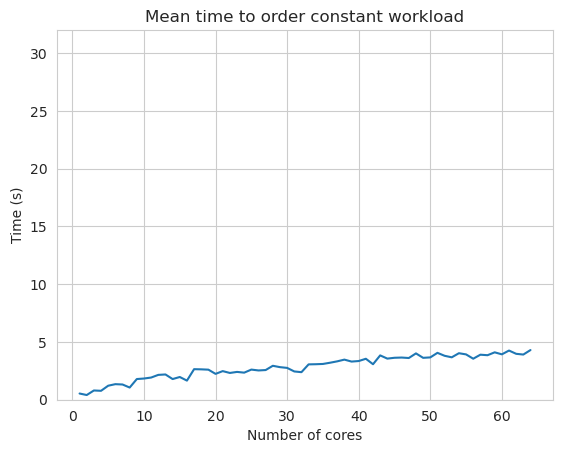

In [22]:
# Plot the mean timings with seaborn

sns.set_style("whitegrid")
ax = sns.lineplot(x="Cores", y="Time", data=mean_times)

ax.set(ylim=(0, 32))

ax.set_title('Mean time to order constant workload')
ax.set_xlabel('Number of cores')
ax.set_ylabel('Time (s)')
plt.show()